In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1. Data Preparation

In [2]:
df = pd.read_csv('inpatientCharges.csv')

In [3]:
df.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,$32963.07,$5777.24,$4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,$15131.85,$5787.57,$4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,$37560.37,$5434.95,$4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,$13998.28,$5417.56,$4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,$31633.27,$5658.33,$4851.44


In [4]:
df.describe()

,Provider Id,Provider Zip Code,Total Discharges
count,163065.000000,163065.000000,163065.000000
mean,255569.865428,47938.121908,42.776304
std,151563.671767,27854.323080,51.104042
min,10001.000000,1040.000000,11.000000
25%,110092.000000,27261.000000,17.000000
50%,250007.000000,44309.000000,27.000000
75%,380075.000000,72901.000000,49.000000
max,670077.000000,99835.000000,3383.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype 
---  ------                                --------------   ----- 
 0   DRG Definition                        163065 non-null  object
 1   Provider Id                           163065 non-null  int64 
 2   Provider Name                         163065 non-null  object
 3   Provider Street Address               163065 non-null  object
 4   Provider City                         163065 non-null  object
 5   Provider State                        163065 non-null  object
 6   Provider Zip Code                     163065 non-null  int64 
 7   Hospital Referral Region Description  163065 non-null  object
 8    Total Discharges                     163065 non-null  int64 
 9    Average Covered Charges              163065 non-null  object
 10   Average Total Payments               163065 non-null  object
 11  Average Medic

In [6]:
df.columns = ['DRG','Provider_Id', 'Provider_Name','Provider_StreetAddress','Provider_City',
               'Provider_State','Provider_Zipcode','Hospital_referral_region_desp',
                'Total_Discharges','Average_Covered_Charges','Average_Total_Payments',
                'Average_Medicare_Payment']
df = df.drop('Average_Covered_Charges',axis=1)

In [7]:
# Change df type and transfer spending amount with dollar sign into numeric
df['DRG'] = df['DRG'].astype('category')
df['Provider_State'] = df['Provider_State'].astype('category')
df['Provider_City'] = df['Provider_City'].astype('category')
df['Provider_Id'] = df['Provider_Id'].astype('category')
df['Average_Total_Payments'] = (df['Average_Total_Payments']
                              .str.replace(r'[^-+\d.]', '').astype(float))
df['Average_Medicare_Payment'] = (df['Average_Medicare_Payment']
                              .str.replace(r'[^-+\d.]', '').astype(float))

C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys
C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  if __name__ == '__main__':


In [8]:
df.head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,5777.24,4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,5787.57,4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,5434.95,4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,5417.56,4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,5658.33,4851.44


In [9]:
df.describe()

,Provider_Zipcode,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment
count,163065.000000,163065.000000,163065.000000,163065.000000
mean,47938.121908,42.776304,9707.473804,8494.490964
std,27854.323080,51.104042,7664.642598,7309.467261
min,1040.000000,11.000000,2673.000000,1148.900000
25%,27261.000000,17.000000,5234.500000,4192.350000
50%,44309.000000,27.000000,7214.100000,6158.460000
75%,72901.000000,49.000000,11286.400000,10056.880000
max,99835.000000,3383.000000,156158.180000,154620.810000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 11 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   DRG                            163065 non-null  category
 1   Provider_Id                    163065 non-null  category
 2   Provider_Name                  163065 non-null  object  
 3   Provider_StreetAddress         163065 non-null  object  
 4   Provider_City                  163065 non-null  category
 5   Provider_State                 163065 non-null  category
 6   Provider_Zipcode               163065 non-null  int64   
 7   Hospital_referral_region_desp  163065 non-null  object  
 8   Total_Discharges               163065 non-null  int64   
 9   Average_Total_Payments         163065 non-null  float64 
 10  Average_Medicare_Payment       163065 non-null  float64 
dtypes: category(4), float64(2), int64(2), object(3)
memory usage: 9.9+ MB


## 2. EDA for Selected Variables

### 2.1 Relation between Provider Payments and Average Medicare Payments

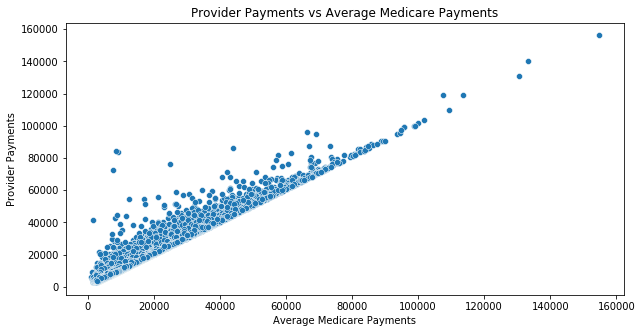

In [11]:
# Plotting a scatterplot
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Average_Medicare_Payment', y='Average_Total_Payments', data=df)
plt.title('Provider Payments vs Average Medicare Payments')
plt.xlabel('Average Medicare Payments')
plt.ylabel('Provider Payments')
plt.show()


The scatterplot serves as a valuable tool for healthcare providers, allowing them to gain a clear understanding of how their payment amounts compare to the average Medicare payments. By examining the plot, providers can easily identify whether their payment amounts are significantly higher than the average. If such a discrepancy exists, it becomes crucial for providers to delve deeper into the reasons behind it and take proactive measures to reduce costs. This analysis empowers providers to optimize their financial operations and ensure they are aligned with industry standards.

### Provider Payments vs. Medicare Payments (with hue)

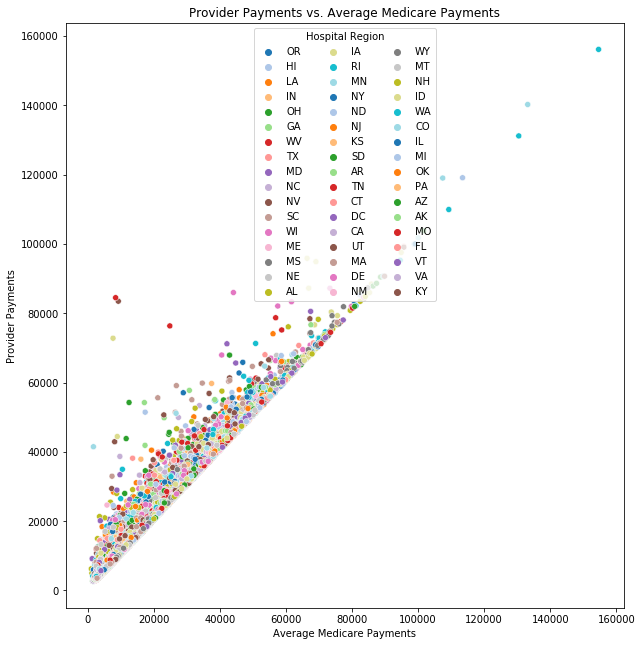

In [12]:
plt.figure(figsize=(10, 5))
scatterplot = sns.scatterplot(x='Average_Medicare_Payment', y='Average_Total_Payments', hue='Hospital_referral_region_desp', data=df, palette='tab20')
plt.title('Provider Payments vs. Average Medicare Payments')
plt.xlabel('Average Medicare Payments')
plt.ylabel('Provider Payments')

# Simplify data labels
handles, labels = scatterplot.get_legend_handles_labels()
new_labels = [label.split('-')[0].strip() for label in labels]
unique_labels = list(set(new_labels))  # Remove duplicates

# Set the number of columns for the legend
num_columns = 3
num_labels = len(unique_labels)
num_rows = num_labels // num_columns + (num_labels % num_columns > 0)

# Create a dictionary
label_handle_dict = dict(zip(unique_labels, handles))

# Create a custom legend
legend = scatterplot.legend(handles=[label_handle_dict[label] for label in unique_labels], labels=unique_labels, title='Hospital Region', ncol=num_columns, loc='upper center')

# Adjust the legend layout
plt.subplots_adjust(top=0.9 + 0.05 * num_rows)

plt.show()

The scatterplot with different colors representing hospital regions provides valuable business insights. It allows us to visually analyze the relationship between provider payments and average Medicare payments based on hospital referral regions. By observing the distribution of data points across the plot, we can identify any patterns or clusters that may indicate variations in payment trends or healthcare practices across different regions. This information can aid healthcare providers, policymakers, and insurance companies in understanding regional payment dynamics and potentially identifying areas for improvement, cost reduction, or targeted interventions.

### 2.2 Analysis of unique DRGs

In [13]:
# Calculate unique DRGs
unique_DRGs = len(df['DRG'].unique())
print("Number of unique DRGs:", unique_DRGs)

Number of unique DRGs: 100


Analyzing the variations in DRGs can help identify the breadth of medical services provided and highlight areas where specialization may be required. It can aid healthcare providers in evaluating their service offerings and identifying opportunities for expansion or improvement.

### 2.3  Total Discharges Distribution

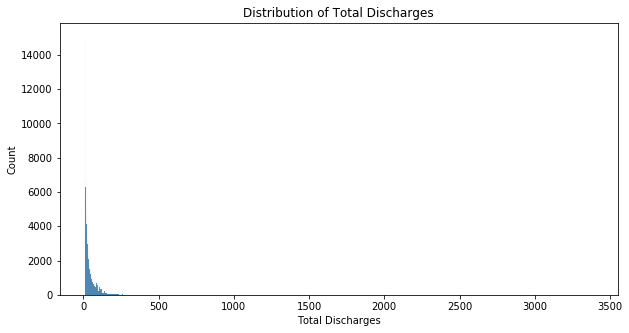

In [14]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Total_Discharges'])
plt.title('Distribution of Total Discharges')
plt.xlabel('Total Discharges')
plt.ylabel('Count')
plt.show()

The histogram reveals a skewed distribution of "Total Discharges" with a majority of samples having lower values. This suggests that a significant portion of healthcare providers handle fewer patient discharges. Understanding this distribution is crucial for resource allocation and optimizing healthcare services to meet patient demand.

### 2.4 Correlation Heatmap

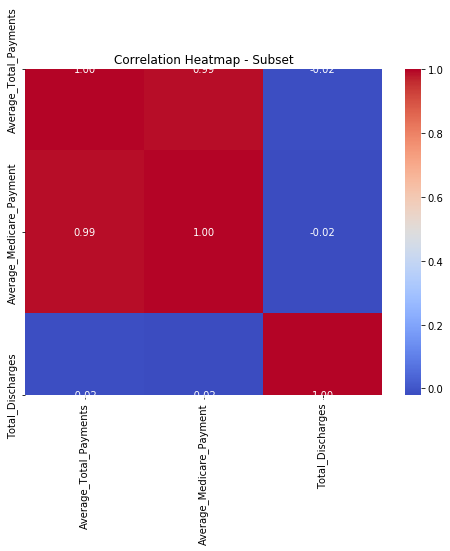

In [15]:
subset_columns = ['Average_Total_Payments', 'Average_Medicare_Payment', 'Total_Discharges']

subset_corr = df[subset_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(subset_corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap - Subset')
plt.show()


The correlation heatmap provides insights into the relationships among the selected variables: Average Total Payments, Average Medicare Payments, and Total Discharges. This information can help identify any potential correlations or dependencies between these variables in the healthcare industry.

## 3. Feature Engineering

In [16]:
# Statewise_Average_Discharge
state_avg_discharge = df.groupby('Provider_State')['Total_Discharges'].mean()
df = df.merge(state_avg_discharge, on='Provider_State', suffixes=('', '_State_Avg_Discharge'))

In [17]:
state_avg_discharge

Provider_State
AK    26.588745
AL    39.258322
AR    41.978229
AZ    36.690284
CA    36.357854
CO    32.444444
CT    47.865738
DC    43.954545
DE    67.901015
FL    48.127208
GA    38.494767
HI    26.497738
IA    39.667820
ID    33.203267
IL    45.720445
IN    42.857512
KS    37.728938
KY    47.250542
LA    36.298646
MA    50.411244
MD    51.955255
ME    37.290541
MI    54.539952
MN    42.480462
MO    44.056664
MS    38.681743
MT    31.037549
NC    51.043841
ND    38.921801
NE    37.475518
NH    34.530984
NJ    52.052839
NM    29.362050
NV    35.440932
NY    47.456635
OH    41.852824
OK    38.607937
OR    30.443418
PA    40.355715
RI    37.906463
SC    42.638918
SD    41.376543
TN    45.361084
TX    40.453388
UT    31.491803
VA    44.644275
VT    37.300000
WA    38.520878
WI    35.309809
WV    40.886092
WY    26.457490
Name: Total_Discharges, dtype: float64

Reflects general hospital discharge rates per state. Not a benchmark as discharge rates can be affected by external factors, not just hospital efficiency.

In [18]:
#2. DRG_Average_Medicare_Payment
drg_avg_medicare_payment = df.groupby('DRG')['Average_Medicare_Payment'].mean()
df = df.merge(drg_avg_medicare_payment, on='DRG', suffixes=('', '_DRG_Avg_Medicare'))

In [19]:
drg_avg_medicare_payment

DRG
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC                                      5555.837525
057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/O MCC                           5701.676570
064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W MCC                   12112.849445
065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W CC                     6781.501785
066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W/O CC/MCC               4469.203560
                                                                                 ...     
885 - PSYCHOSES                                                               5864.125644
897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REHABILITATION THERAPY W/O MCC     3999.917704
917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC                                9566.820747
918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC                              3530.394718
948 - SIGNS & SYMPTOMS W/O MCC                                                3911.244997
Name: 

DRG_Average_Medicare_Payment: Reflects the costliness of each DRG from Medicare's perspective. Not a benchmark since it doesn't consider individual provider costs or patient outcomes.

In [20]:
# 3. Citywise_Average_Total_Payments
city_avg_payments = df.groupby('Provider_City')['Average_Total_Payments'].mean()
df = df.merge(city_avg_payments, on='Provider_City', suffixes=('', '_City_Avg'))

In [21]:
city_avg_payments

Provider_City
ABBEVILLE       6663.217222
ABERDEEN        9327.920561
ABILENE         8994.949539
ABINGDON        7173.921270
ABINGTON       10321.999293
                   ...     
ZANESVILLE      8932.169271
ZEELAND         6736.034545
ZEPHYRHILLS     7613.083125
ZION           13013.765000
ZUNI            9500.750000
Name: Average_Total_Payments, Length: 1977, dtype: float64

Citywise_Average_Total_Payments: Shows the average cost of healthcare in each city. Not a benchmark as prices can fluctuate due to factors like location and patient demographics.

In [22]:
# 4. Provider_Payment_Difference
# Calculate state-wise average total payments
state_avg_payments = df.groupby('Provider_State')['Average_Total_Payments'].mean()

# Merge state average payments back into the DataFrame
df = df.merge(state_avg_payments, on='Provider_State', suffixes=('', '_State_Avg'))

# Calculate Provider_Payment_Difference
df['Provider_Payment_Difference'] = df['Average_Total_Payments'] - df['Average_Total_Payments_State_Avg']

# Calculate DRG_Payment_Ratio
df['DRG_Payment_Ratio'] = df['Average_Total_Payments'] / df['Average_Total_Payments'].mean()


In [23]:
df['Provider_Payment_Difference'] 

0         -1790.992149
1         -2211.952149
2         -2673.472149
3         -2714.232149
4         -3562.002149
              ...     
163060    -4272.228004
163061    14090.021996
163062     1862.151996
163063     1894.241996
163064    -4605.688004
Name: Provider_Payment_Difference, Length: 163065, dtype: float64

Provider_Payment_Difference: Indicates whether a provider's charges are above the state average. Not a benchmark as higher costs could reflect higher quality care or more complex cases.

In [24]:
# 5.DRG_Payment_Ratio
# Calculate DRG-wise average total payments
drg_avg_payments = df.groupby('DRG')['Average_Total_Payments'].mean()

# Merge DRG average payments back into the DataFrame
df = df.merge(drg_avg_payments, on='DRG', suffixes=('', '_DRG_Avg'))

# Calculate Provider_Payment_Difference
df['Provider_Payment_Difference'] = df['Average_Total_Payments'] - df['Average_Total_Payments_DRG_Avg']

# Calculate DRG_Payment_Ratio
df['DRG_Payment_Ratio'] = df['Average_Total_Payments'] / df['Average_Total_Payments_DRG_Avg']


In [25]:
df['DRG_Payment_Ratio'] 

0         0.830000
1         0.769521
2         0.831484
3         0.780824
4         0.778325
            ...   
163060    1.344512
163061    0.885732
163062    0.978298
163063    0.919504
163064    1.042286
Name: DRG_Payment_Ratio, Length: 163065, dtype: float64

DRG_Payment_Ratio: Shows if a provider charges more for a DRG than the average. Not a benchmark because a higher ratio could be due to treating more complex cases within that DRG.

In [26]:
# 6. DRG_Count_in_State
drg_count_state = df.groupby(['Provider_State', 'DRG']).size().reset_index(name='DRG_Count_in_State')
df = df.merge(drg_count_state, on=['Provider_State', 'DRG'])

In [27]:
drg_count_state 

,Provider_State,DRG,DRG_Count_in_State
0,AK,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,1
1,AK,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,1
2,AK,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,2
3,AK,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,6
4,AK,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,4
...,...,...,...
5095,WY,885 - PSYCHOSES,0
5096,WY,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...,1
5097,WY,917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC,1
5098,WY,918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC,2


In [28]:
# 7. Citywise_Average_Medicare_Payment
city_avg_medicare_payment = df.groupby('Provider_City')['Average_Medicare_Payment'].mean().reset_index(name='Citywise_Average_Medicare_Payment')
df = df.merge(city_avg_medicare_payment, on='Provider_City')


In [29]:
city_avg_medicare_payment

,Provider_City,Citywise_Average_Medicare_Payment
0,ABBEVILLE,5936.423333
1,ABERDEEN,8338.016168
2,ABILENE,7558.788618
3,ABINGDON,6156.648571
4,ABINGTON,9072.775556
...,...,...
1972,ZANESVILLE,7632.901354
1973,ZEELAND,5499.131818
1974,ZEPHYRHILLS,6575.635750
1975,ZION,4626.235000


The average Medicare payment in each city. Like the statewise feature, it captures geographical cost variations but at a more granular level. Not a benchmark because it varies by city.

In [30]:
# 8. Statewise_Max_Total_Payments
state_max_payments = df.groupby('Provider_State')['Average_Total_Payments'].max().reset_index(name='Statewise_Max_Total_Payments')
df = df.merge(state_max_payments, on='Provider_State')


In [31]:
state_max_payments

,Provider_State,Statewise_Max_Total_Payments
0,AK,77566.38
1,AL,48198.38
2,AR,57325.95
3,AZ,71437.35
4,CA,156158.18
5,CO,68294.66
6,CT,73887.44
7,DC,99067.50
8,DE,50707.91
9,FL,73454.80


This feature represents the average Medicare payment for each state. It can capture geographical differences in healthcare costs. Not a benchmark since it's specific to each state.

In [32]:
# 9. DRGwise_Min_Medicare_Payment
drg_min_medicare_payment = df.groupby('DRG')['Average_Medicare_Payment'].min().reset_index(name='DRGwise_Min_Medicare_Payment')
df = df.merge(drg_min_medicare_payment, on='DRG')

In [33]:
drg_min_medicare_payment

,DRG,DRGwise_Min_Medicare_Payment
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,3592.85
1,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,3116.42
2,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,6603.63
3,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,4109.25
4,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,2771.88
...,...,...
95,885 - PSYCHOSES,1978.60
96,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...,1878.83
97,917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC,5137.27
98,918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC,1603.83


The total number of discharges for each DRG. May reveal procedures that are done more often. Not a benchmark since it's specific to each DRG.

In [34]:
# 10.Hospital_Service_Volume
hospital_service_volume = df.groupby('Provider_Id')['Total_Discharges'].sum().reset_index(name='Hospital_Service_Volume')
df = df.merge(hospital_service_volume, on='Provider_Id')

In [35]:
hospital_service_volume 

,Provider_Id,Hospital_Service_Volume
0,10001,5405
1,10005,1419
2,10006,3901
3,10007,603
4,10008,161
...,...,...
3332,670072,553
3333,670073,219
3334,670075,81
3335,670076,18


The average total payment for each DRG. Shows the typical cost for different procedures. Not a benchmark as it varies by DRG.

The difference between a specific payment and the average total payment for that DRG. Helps identify unusually high or low costs for a procedure. Not a benchmark as it's specific to each payment and DRG.

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163065 entries, 0 to 163064
Data columns (total 23 columns):
 #   Column                                     Non-Null Count   Dtype   
---  ------                                     --------------   -----   
 0   DRG                                        163065 non-null  category
 1   Provider_Id                                163065 non-null  category
 2   Provider_Name                              163065 non-null  object  
 3   Provider_StreetAddress                     163065 non-null  object  
 4   Provider_City                              163065 non-null  category
 5   Provider_State                             163065 non-null  category
 6   Provider_Zipcode                           163065 non-null  int64   
 7   Hospital_referral_region_desp              163065 non-null  object  
 8   Total_Discharges                           163065 non-null  int64   
 9   Average_Total_Payments                     163065 non-null  float64 
 

In [37]:
df.describe()

,Provider_Zipcode,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,Total_Discharges_State_Avg_Discharge,Average_Medicare_Payment_DRG_Avg_Medicare,Average_Total_Payments_City_Avg,Average_Total_Payments_State_Avg,Provider_Payment_Difference,DRG_Payment_Ratio,Average_Total_Payments_DRG_Avg,DRG_Count_in_State,Citywise_Average_Medicare_Payment,Statewise_Max_Total_Payments,DRGwise_Min_Medicare_Payment,Hospital_Service_Volume
count,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000,1.630650e+05,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000
mean,47938.121908,42.776304,9707.473804,8494.490964,42.776304,8494.490964,9707.473804,9707.473804,-3.141247e-14,1.000000,9707.473804,72.747095,8494.490964,85168.378484,4747.672630,3281.562181
std,27854.323080,51.104042,7664.642598,7309.467261,5.874590,6685.528070,2274.636602,1386.469166,3.086325e+03,0.248259,7015.792522,55.030416,2209.348121,30586.213435,3522.320614,2395.821491
min,1040.000000,11.000000,2673.000000,1148.900000,26.457490,2876.015593,3623.440000,7568.232149,-2.372285e+04,0.464005,3912.283709,1.000000,2872.330000,39845.680000,1148.900000,11.000000
25%,27261.000000,17.000000,5234.500000,4192.350000,38.520878,4437.804065,8284.709767,8808.127651,-1.204155e+03,0.839686,5493.361883,32.000000,7099.879583,64668.660000,2456.830000,1555.000000
50%,44309.000000,27.000000,7214.100000,6158.460000,41.852824,6132.341256,9411.176543,9243.979573,-5.043133e+02,0.928391,7110.467094,58.000000,8180.998548,73887.440000,3563.630000,2793.000000
75%,72901.000000,49.000000,11286.400000,10056.880000,47.456635,10543.478465,10702.095684,10279.981536,6.559079e+02,1.085989,11576.152711,100.000000,9400.506082,95868.640000,5827.000000,4462.000000
max,99835.000000,3383.000000,156158.180000,154620.810000,67.901015,41899.432929,42446.710000,14572.391732,1.175693e+05,9.449417,44259.485463,273.000000,39943.165000,156158.180000,19673.710000,25828.000000


### Summary
In anomaly detection, these features offer invaluable business and data insights. Statewise_Average_Discharge reveals operational anomalies within hospitals, potentially indicating patient care issues or inefficiencies. DRG_Average_Medicare_Payment can spotlight unusual payments, suggesting fraudulent activities or underpayment issues. Citywise_Average_Total_Payments uncovers geographic disparities in healthcare costs. Provider_Payment_Difference and DRG_Payment_Ratio provide a comparative view of payment practices among providers, highlighting possible overpricing or efficiency. Thus, these features form a holistic tool for spotting irregularities in healthcare services that could affect patient care, operational efficacy, and financial stability.

The discussed aspects in the article boost my feature engineering and EDA process by encouraging scalability and adaptability. The approach of handling various healthcare areas helps in crafting robust and generalized features. Meanwhile, the customization aspect aids in conducting a detailed and specific EDA, enhancing my understanding of data patterns and trends. Furthermore, the focus on cost-effective fraud detection offers insights into designing features capable of identifying anomalies efficiently, optimizing my data usage.

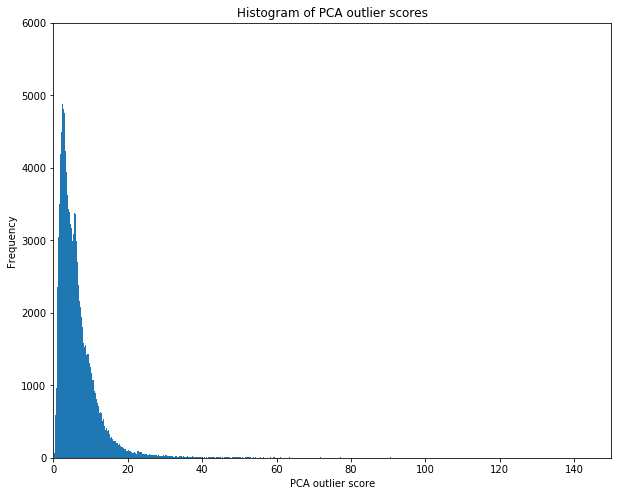

Data Statistics:
       Group   Count   Count %  Provider_Zipcode  Total_Discharges  \
0  Anomalous    8154   5.00046          53046.62            132.93   
1     Normal  154911  94.99954          47669.23             38.03   

   Average_Total_Payments  Average_Medicare_Payment  \
0                17361.06                  15452.82   
1                 9304.61                   8128.23   

   Total_Discharges_State_Avg_Discharge  \
0                                 43.20   
1                                 42.75   

   Average_Medicare_Payment_DRG_Avg_Medicare  Average_Total_Payments_City_Avg  \
0                                   12421.22                         11521.60   
1                                    8287.80                          9611.98   

   Average_Total_Payments_State_Avg  Provider_Payment_Difference  \
0                          10826.25                      3497.94   
1                           9648.59                      -184.12   

   DRG_Payment_Ratio  Avera

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from pyod.utils.utility import standardizer

#  non-numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
X = df[numeric_columns]

# standardize the data
X_norm = standardizer(X)

# apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Select 2 principal components for visualization
pca.fit(X_norm)
X_pca = pca.transform(X_norm)

# obtain anomaly scores for the data
y_scores = np.sum(np.square(X_norm - pca.inverse_transform(X_pca)), axis=1)

# Increase figure size
plt.figure(figsize=(10, 8))

# Plot the histogram of anomaly scores
plt.hist(y_scores, bins='auto')
plt.title("Histogram of PCA outlier scores")
plt.xlabel('PCA outlier score')
plt.ylabel('Frequency')

# set x-axis and y-axis limits
plt.xlim(0, 150)
plt.ylim(0, 6000)

plt.show()

# determine the threshold for anomaly detection
threshold = np.percentile(y_scores, 95)  # Using the 95th percentile as the threshold

# Define a function to compute descriptive statistics and apply the threshold
def descriptive_stat_threshold(df, pred_score, threshold):
    df = pd.DataFrame(df)
    df['Anomaly_Score'] = pred_score
    df['Group'] = np.where(df['Anomaly_Score'] > threshold, 'Anomalous', 'Normal')
    cnt = df.groupby('Group')['Anomaly_Score'].count().reset_index().rename(columns={'Anomaly_Score': 'Count'})
    cnt['Count %'] = (cnt['Count'] / cnt['Count'].sum()) * 100
    stat = df.groupby('Group').mean().round(2).reset_index()
    stat = cnt.merge(stat, left_on='Group', right_on='Group')
    return stat

# Apply the function to the data
data_stat = descriptive_stat_threshold(X, y_scores, threshold)
print("Data Statistics:")
print(data_stat)

# make predictions on the data
y_pred = np.where(y_scores > threshold, 1, 0)

# Evaluate the predictions
prediction_results = pd.crosstab(index=df.index, columns=y_pred)
print("\nPrediction Results:")
print(prediction_results)


The Data Statistics section provides an analysis of the dataset based on the generated features. The dataset is divided into two groups: "Anomalous" and "Normal".

The "Anomalous" group represents around 5% of the total data, consisting of 8,154 data points. This group exhibits higher values in several features compared to the "Normal" group. For example, the Provider Zipcode is around 53,046.62, indicating that anomalous cases are associated with specific locations. The Total Discharges average around 132.93, suggesting a higher volume of patients. Similarly, the Average Total Payments and Average Medicare Payments are significantly higher, with values of approximately 17,361.06 and 15,452.82, respectively.

In terms of specific feature comparisons, the Anomalous group has higher values for Total Discharges State Avg Discharge, Average Medicare Payment DRG Avg Medicare, and Average Total Payments City Avg. These differences indicate that the Anomalous group deviates from the average values more significantly than the Normal group.

The Prediction Results section displays the classification results obtained from the model. The table represents the distribution of data points across the predicted categories 0 and 1. Most of the data points are classified as category 0, while category 1 has a count of 0 for the majority of data points.

Based on the generated features and analysis, it can be observed that the dataset contains a relatively small portion of anomalous cases. These cases exhibit higher values in various features, suggesting potential outliers in the dataset. However, further investigation and domain knowledge are necessary to determine the nature and significance of these anomalies.

Analysis of the Prediction Results:

The prediction results show the classification of data points into two categories: 0 and 1. The table displays the distribution of data points across these categories.

Category 0: It has a count of 1 for most of the data points.
Category 1: It has a count of 0 for most of the data points.
From the provided information, it appears that the majority of the data points are concentrated in the range of 0 to 20 on the histogram. Data points beyond 20 can be considered outliers.

## New Features

The new features are added to improve the anomaly detection models (KNN and PCA) by capturing additional information and patterns in the data. The distance to cluster center feature helps identify outliers located far from cluster centroids, while neighbor density reflects the local density of a data point. The outlier score quantifies the deviation from local density patterns. Additionally, interaction terms capture complex feature relationships. These new features enhance the models' ability to detect anomalies by providing more comprehensive information about the data distribution and relationships.

In [41]:
from sklearn.cluster import KMeans

# Apply K-means clustering
kmeans = KMeans(n_clusters=10)
kmeans.fit(X_norm)

# Calculate distance to cluster center
dist_to_center = []
for i in range(len(X_norm)):
    cluster_label = kmeans.labels_[i]
    center = kmeans.cluster_centers_[cluster_label]
    dist = np.linalg.norm(X_norm[i] - center)
    dist_to_center.append(dist)

# Add the new feature to the DataFrame
df['Distance_to_Center'] = dist_to_center


In [42]:
from sklearn.neighbors import NearestNeighbors

# Find K nearest neighbors
k = 5
neighbors = NearestNeighbors(n_neighbors=k+1)
neighbors.fit(X_norm)
distances, indices = neighbors.kneighbors(X_norm)

# Calculate density of neighbors
density = 1 / (distances[:, 1:].sum(axis=1) / k)

# Add the new feature to the DataFrame
df['Neighbor_Density'] = density


In [43]:
from sklearn.neighbors import LocalOutlierFactor

# Apply Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20)
outlier_score = -lof.fit_predict(X_norm)

# Add the new feature to the DataFrame
df['Outlier_Score'] = outlier_score


In [44]:
from sklearn.preprocessing import PolynomialFeatures

# Create interaction terms
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_interactions = poly.fit_transform(X_norm)

# Add the new interaction features to the DataFrame
interaction_columns = poly.get_feature_names(X.columns)
df_interaction = pd.DataFrame(X_interactions, columns=interaction_columns)
df = pd.concat([df, df_interaction], axis=1)


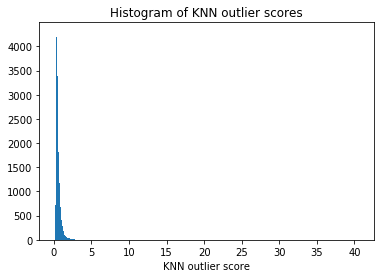

Data Statistics:
     Group   Count    Count %  Provider_Zipcode  Total_Discharges  \
0   Normal  146758  89.999693          48035.61             37.37   
1  Outlier   16307  10.000307          47060.77             91.40   

   Average_Total_Payments  Average_Medicare_Payment  \
0                 8306.73                   7222.13   
1                22313.73                  19945.31   

   Total_Discharges_State_Avg_Discharge  \
0                                 42.75   
1                                 43.03   

   Average_Medicare_Payment_DRG_Avg_Medicare  Average_Total_Payments_City_Avg  \
0                                    7467.16                          9541.68   
1                                   17740.19                         11199.54   

   Average_Total_Payments_State_Avg  Provider_Payment_Difference  \
0                           9666.10                      -307.98   
1                          10079.86                      2771.72   

   DRG_Payment_Ratio  Average_

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyod.models.knn import KNN
from pyod.utils.utility import standardizer

# filter out non-numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
X = df[numeric_columns]

# standardize the data
X_norm = standardizer(X)

# train the KNN model
k = 5  # number of neighbors
knn = KNN(n_neighbors=k)
knn.fit(X_norm)

# obtain anomaly scores for the data
y_scores = knn.decision_scores_

# P=lot the histogram of anomaly scorees
plt.hist(y_scores, bins='auto')
plt.title("Histogram of KNN outlier scores")
plt.xlabel('KNN outlier score')
plt.show()

# Determine the threshold for anomaly detection
threshold = knn.threshold_

# define a function to computes descriptive  and apply the threshold
def descriptive_stat_threshold(df, pred_score, threshold):
    df = pd.DataFrame(df)
    df['Anomaly_Score'] = pred_score
    df['Group'] = np.where(df['Anomaly_Score'] < threshold, 'Normal', 'Outlier')
    cnt = df.groupby('Group')['Anomaly_Score'].count().reset_index().rename(columns={'Anomaly_Score': 'Count'})
    cnt['Count %'] = (cnt['Count'] / cnt['Count'].sum()) * 100
    stat = df.groupby('Group').mean().round(2).reset_index()
    stat = cnt.merge(stat, left_on='Group', right_on='Group')
    return stat

# apply the function to the data
data_stat = descriptive_stat_threshold(X, y_scores, threshold)
print("Data Statistics:")
print(data_stat)

# Make predictions on the data
y_pred = knn.predict(X_norm)

# Evaluate the predictions
prediction_results = pd.crosstab(index=df.index, columns=y_pred)
print("\nPrediction Results:")
print(prediction_results)



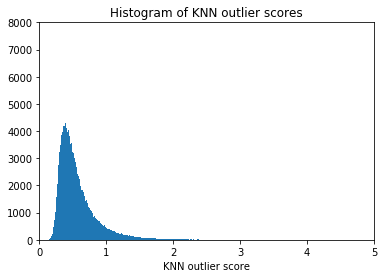

In [46]:
# Plot the histogram of anomaly scores
plt.hist(y_scores, bins='auto')
plt.title("Histogram of KNN outlier scores")
plt.xlabel('KNN outlier score')
plt.xlim(0, 5)
plt.ylim(0, 8000)
plt.show()


The data statistics and prediction results show that the majority of the data points are classified as "Normal" (89.99%) based on the outlier detection model. These normal data points exhibit relatively lower average total payments and average Medicare payments, along with lower values for other features compared to the outliers. On the other hand, the "Outlier" group (10.00%) consists of data points with higher average total payments and average Medicare payments, indicating potential anomalies or unusual patterns.

The prediction results, presented in the form of a confusion matrix, demonstrate the model's ability to classify data points as either "Normal" or "Outlier." The matrix shows that there are some misclassifications, as indicated by the non-diagonal values.

In the histogram, the majority of data points fall within the range of 0.2 to 1.5 on the anomaly score scale. Data points with scores exceeding 1.5 are considered outliers based on the chosen threshold. These outliers represent potential anomalies or deviations from the normal patterns observed in the data.

Overall, the model demonstrates the ability to detect anomalies by distinguishing normal data points from potential outliers, providing insights into the distribution and patterns present in the dataset.